# Predicting if a passenger survived the sinking of the Titanic or not.

This notebook looks into various Python-based machine learning and data science librairies in an attempt to build a machine learning capable of predicting wether or not someone has survived the sinking of the Titanic based on taveling information.

We are going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1.Problem Definition

In a statement,
> Given travel information about a passenger, can we predict wether or not they have survived.

## 2.Data

The information come from kaggle:
https://www.kaggle.com/competitions/titanic/data

## 3.Evaluation

>If we can reach 95% accuracy at predicting whether or not a passenger has survived during the proof of concept, we'll pursure this project.

## 4.Features

**Variable	Definition	Key**

1. survival - Survival	0 = No, 1 = Yes
2. pclass -	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
3. sex - Sex	
4. Age -	Age in years	
5. sibsp -	# of siblings / spouses aboard the Titanic	
6. parch -	# of parents / children aboard the Titanic	
7. ticket -	Ticket number	
8. fare -	Passenger fare	
9. cabin -	Cabin number	
10. embarked -	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

**Variable Notes**

1. pclass: A proxy for socio-economic status (SES)
2. 1st = Upper
3. 2nd = Middle
4. 3rd = Lower
5. age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
6. sibsp: The dataset defines family relations in this way...
7. Sibling = brother, sister, stepbrother, stepsister
8. Spouse = husband, wife (mistresses and fiancés were ignored)
9. parch: The dataset defines family relations in this way...
10. Parent = mother, father
11. Child = daughter, son, stepdaughter, stepson
12. Some children travelled only with a nanny, therefore parch=0 for them.

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
# we want our plots to appear inside the notebook
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Models Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

## Load data

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

## Data exploration (exploratory data analysis or EDA)

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

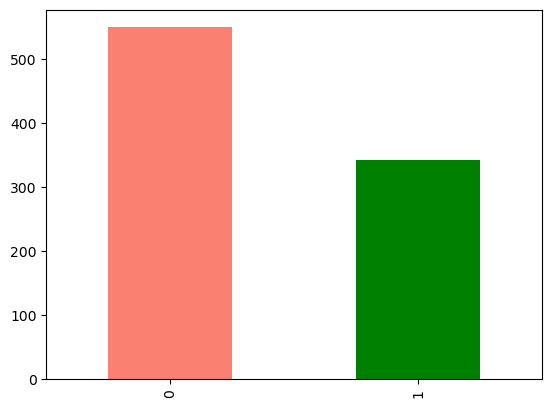

In [6]:
train_df["Survived"].value_counts().plot(kind="bar", 
                                         color=["salmon", "green"])

In [7]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from 0.4 to 80. On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature.

In [9]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [10]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [11]:
Sex_Survived = pd.crosstab(train_df.Survived, train_df.Sex)
Sex_Survived

Sex,female,male
Survived,,
0,81,468
1,233,109


In [12]:
female_Survived = train_df["Survived"][train_df.Sex == "female"]
female_Survived

1      1
2      1
3      1
8      1
9      1
      ..
880    1
882    0
885    0
887    1
888    0
Name: Survived, Length: 314, dtype: int64

In [13]:
rate_female_alive = round(sum(female_Survived)/female_Survived.count()*100, 1) 
rate_female_alive

74.2

In [14]:
male_Survived = train_df["Survived"][train_df.Sex == "male"]
rate_male_alive = round(sum(male_Survived)/male_Survived.count()*100, 1) 
rate_male_alive

18.9

In [15]:
Sex_Survived_percent = Sex_Survived
Sex_Survived_percent

Sex,female,male
Survived,,
0,81,468
1,233,109


In [16]:
Sex_Survived_percent["female"] = [100-rate_female_alive, rate_female_alive]
Sex_Survived_percent["male"] = [100-rate_male_alive, rate_male_alive]
Sex_Survived_percent

Sex,female,male
Survived,,
0,25.8,81.1
1,74.2,18.9


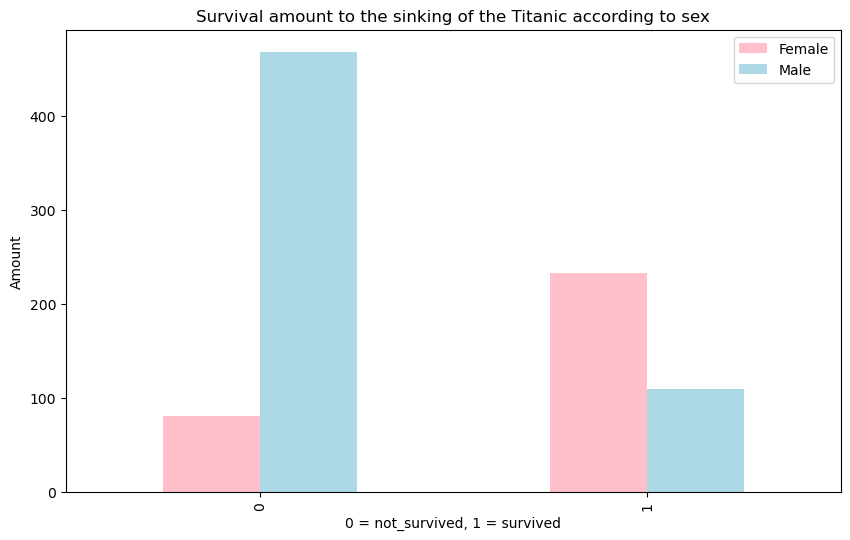

In [17]:
pd.crosstab(train_df.Survived, train_df.Sex).plot(kind="bar",
                                                  figsize=(10, 6),
                                                  color=["pink","lightblue"]);
plt.title("Survival amount to the sinking of the Titanic according to sex")
plt.xlabel("0 = not_survived, 1 = survived")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])

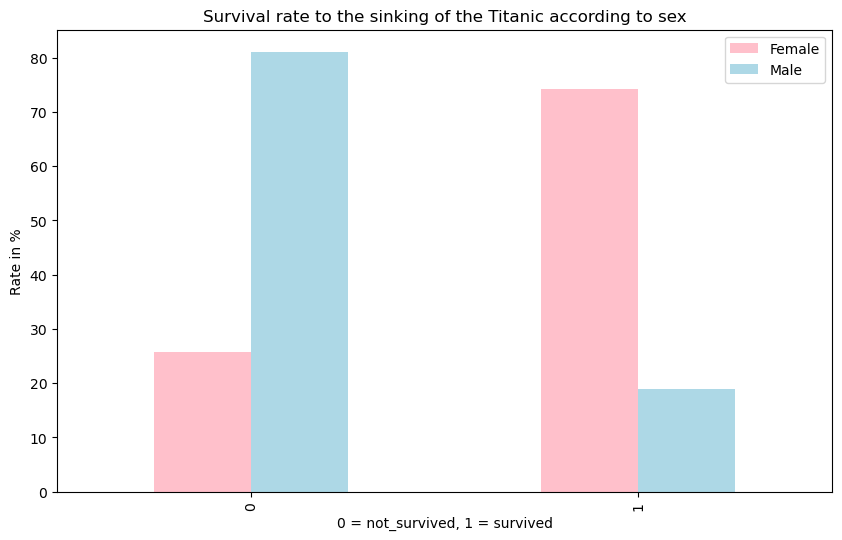

In [18]:
Sex_Survived_percent.plot(kind="bar",
                          figsize=(10, 6),
                          color=["pink","lightblue"]);
plt.title("Survival rate to the sinking of the Titanic according to sex")
plt.xlabel("0 = not_survived, 1 = survived")
plt.ylabel("Rate in %")
plt.legend(["Female", "Male"])

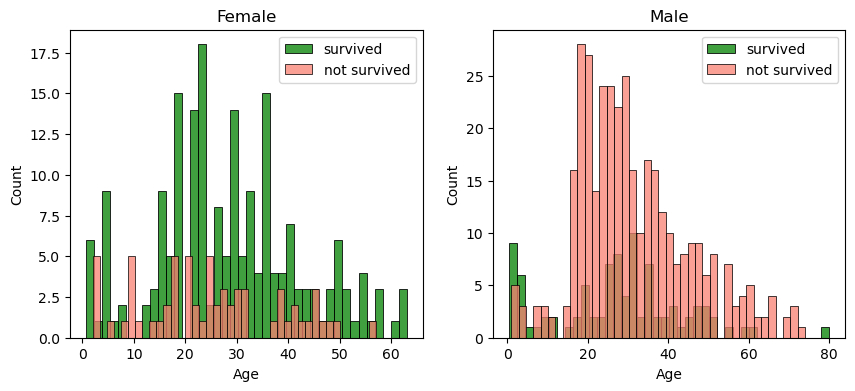

In [19]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=40, label = survived, ax = axes[0], kde =False, color="green")
# KDE a parabol, bin is the number of bar.
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color="salmon")
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=40, label = survived, ax = axes[1], kde = False, color="green")
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color="salmon")
ax.legend()
_ = ax.set_title('Male')

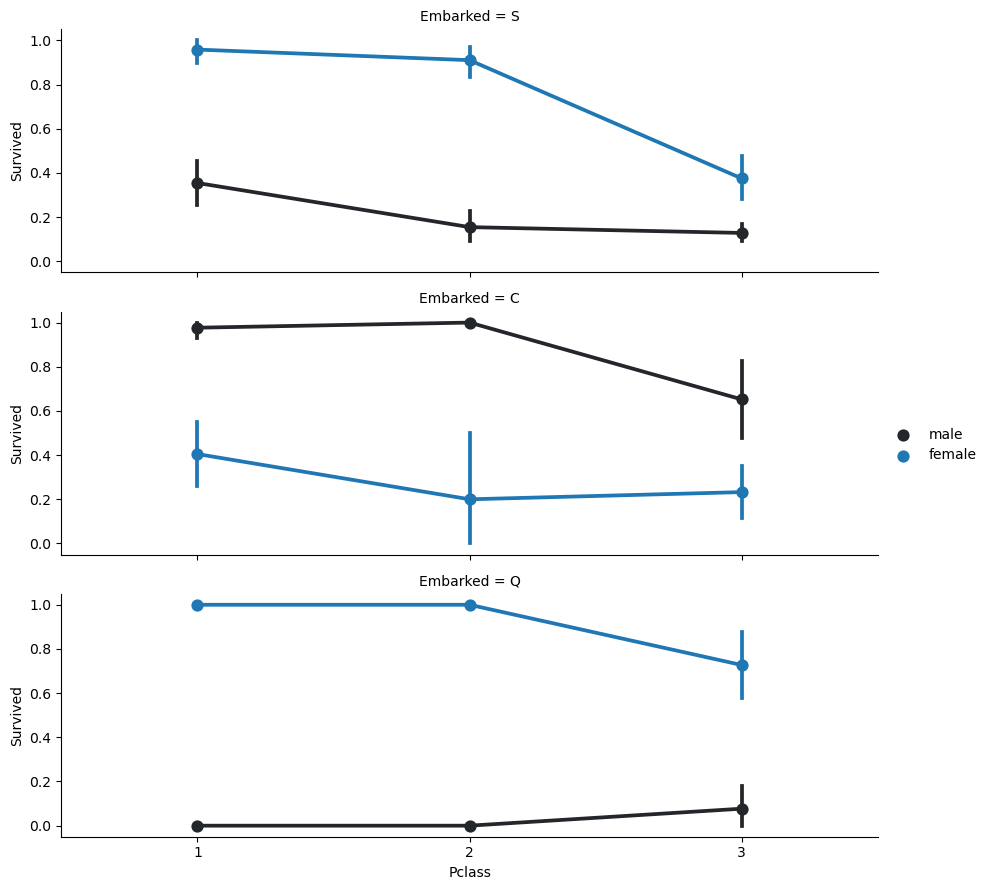

In [20]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', height=3, aspect=3)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend();

In [21]:
Pclass_survived = pd.crosstab(train_df.Pclass, train_df.Survived)
Pclass_survived

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


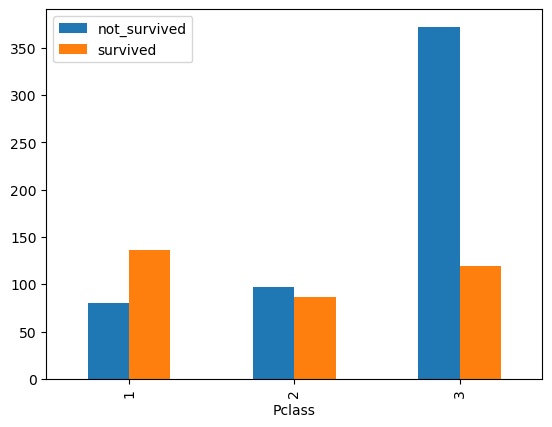

In [22]:
Pclass_survived.plot(kind="bar")
plt.legend(["not_survived", "survived"])

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

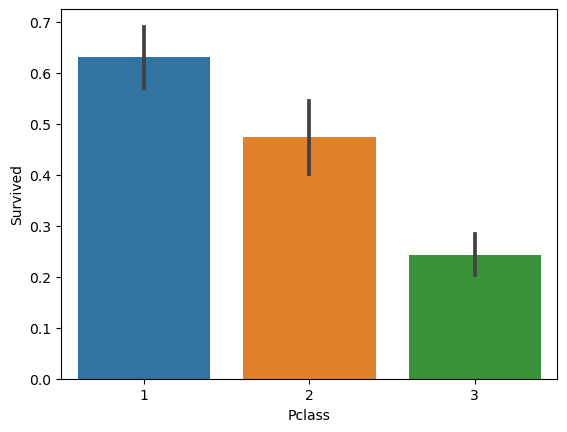

In [23]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

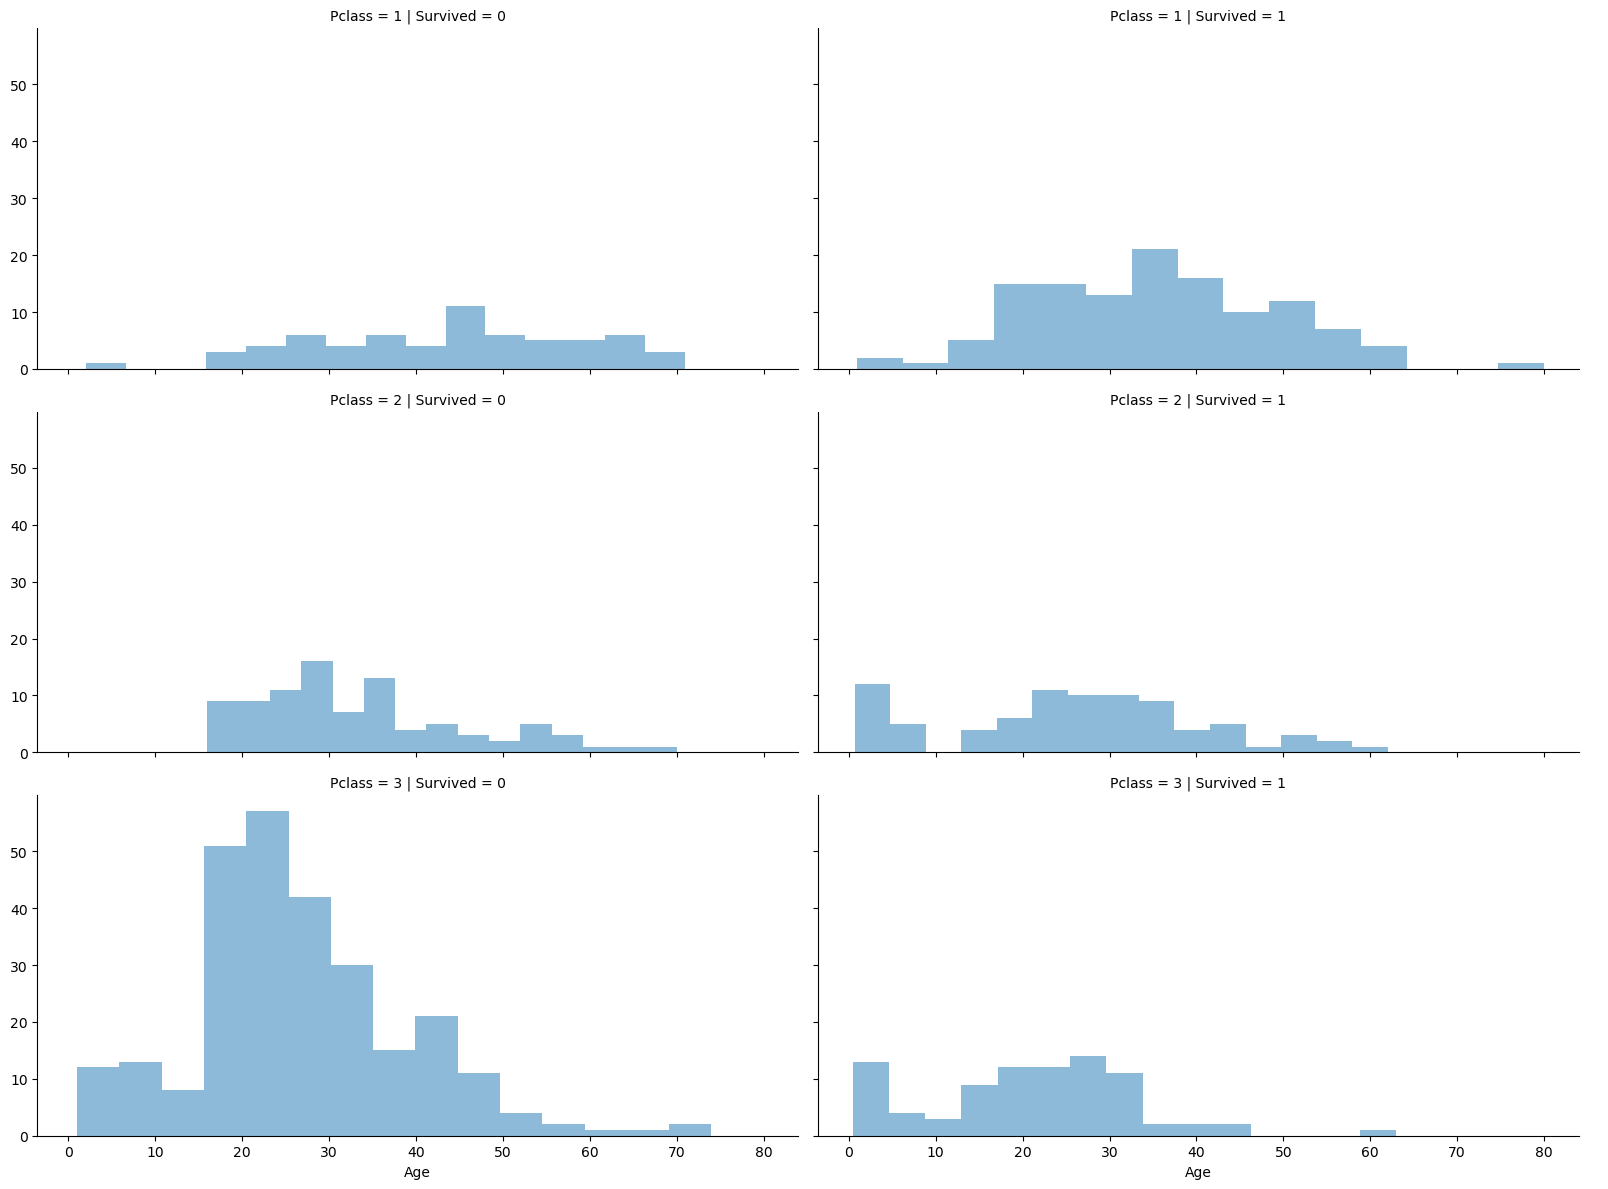

In [24]:
FacetGrid = sns.FacetGrid(train_df, row='Pclass', col='Survived', height=4, aspect=2)
FacetGrid.map(plt.hist, 'Age', alpha=0.5, bins=15)
FacetGrid.add_legend();

In [25]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 1
    # loc permet de selectionner uniquement les lignes qui répondent à la condition
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 0
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

0    537
1    354
Name: not_alone, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


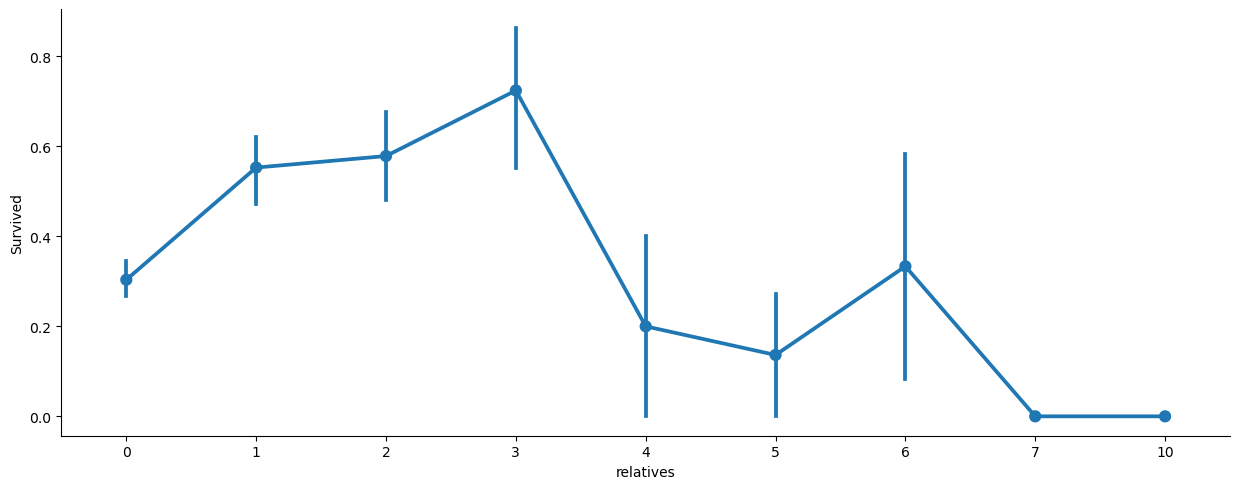

In [26]:
axes = sns.factorplot('relatives','Survived', 
                      data=train_df, aspect = 2.5, )

First, I will drop ‘PassengerId’ from the train set, because it does not contribute to a persons survival probability. I will not drop it from the test set, since it is required there for the submission

In [27]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [28]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


Cabin:
As a reminder, we have to deal with Cabin (687), Embarked (2) and Age (177). First I thought, we have to delete the ‘Cabin’ variable but then I found something interesting. A cabin number looks like ‘C123’ and the letter refers to the deck. Therefore we’re going to extract these and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero. In the picture below you can see the actual decks of the titanic, ranging from A to G.

In [29]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [30]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,8


Now we can tackle the issue with the age features missing values. I will create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.

In [31]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [32]:
rand_age

array([23, 36, 22, 19, 33, 27, 28, 19, 25, 32, 27, 30, 23, 19, 38, 34, 32,
       28, 39, 27, 39, 27, 29, 26, 25, 39, 19, 18, 28, 39, 21, 20, 37, 40,
       37, 40, 41, 28, 39, 40, 33, 20, 40, 19, 26, 21, 33, 37, 36, 21, 23,
       21, 22, 38, 22, 33, 31, 20, 17, 17, 37, 17, 23, 33, 27, 16, 20, 33,
       34, 17, 42, 18, 16, 29, 15, 38, 30, 23, 37, 30, 34, 32, 39, 40, 26,
       35])

Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.

In [33]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [34]:
train_df['Embarked'].isnull().sum()

2

In [35]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


In [37]:
train_df['Fare'].isnull().sum()

0

In [38]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [39]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S,1,1,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C,1,1,3
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,S,0,0,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S,1,1,3
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,S,0,0,8
887,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,S,0,0,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,41,1,2,W./C. 6607,23,S,3,1,8
889,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C,0,0,3


In [40]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',
                                                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)   

In [41]:
dataset['Title']

0      1
1      3
2      1
3      1
4      3
      ..
413    1
414    5
415    1
416    1
417    4
Name: Title, Length: 418, dtype: int64

In [42]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [43]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.

In [44]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [45]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

Now we need to convert the ‘age’ feature. First we will convert it from float into integer. Then we will create the new ‘AgeGroup” variable, by categorizing every age into a group. Note that it is important to place attention on how you form these groups, since you don’t want for example that 80% of your data falls into group 1.



In [46]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed train_df['Age'].value_counts()

For the ‘Fare’ feature, we need to do the same as with the ‘Age’ feature. But it isn’t that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use sklearn “qcut()” function, that we can use to see, how we can form the categories.

In [47]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,1,8,1
1,1,1,1,5,1,0,71,1,1,1,3,3
2,1,3,1,3,0,0,7,0,0,0,8,2
3,1,1,1,5,1,0,53,0,1,1,3,3
4,0,3,0,5,0,0,8,0,0,0,8,1
5,0,3,0,2,0,0,8,2,0,0,8,1
6,0,1,0,6,0,0,51,0,0,0,5,1
7,0,3,0,0,3,1,21,0,4,1,8,4
8,1,3,1,3,0,2,11,0,2,1,8,3
9,1,2,1,1,1,0,30,1,1,1,8,3


In [48]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [49]:
train_df["Fare"]

0      0
1      3
2      0
3      3
4      1
      ..
886    1
887    2
888    2
889    2
890    0
Name: Fare, Length: 891, dtype: int32

## Creating new Features

I will add two new features to the dataset, that I compute out of other features

### 1. Age times Class

In [50]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [51]:
dataset['Age_Class']

0       6
1      15
2       6
3      15
4      15
       ..
413    15
414     6
415    15
416    15
417     3
Name: Age_Class, Length: 418, dtype: int64

### 2. Fare per Person

In [52]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
# Let's take a last look at the training set, before we start training the models.
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,1,8,1,6,0
1,1,1,1,5,1,0,3,1,1,1,3,3,5,1
2,1,3,1,3,0,0,0,0,0,0,8,2,9,0
3,1,1,1,5,1,0,3,0,1,1,3,3,5,1
4,0,3,0,5,0,0,1,0,0,0,8,1,15,1
5,0,3,0,2,0,0,1,2,0,0,8,1,6,1
6,0,1,0,6,0,0,3,0,0,0,5,1,6,3
7,0,3,0,0,3,1,2,0,4,1,8,4,0,0
8,1,3,1,3,0,2,1,0,2,1,8,3,9,0
9,1,2,1,1,1,0,2,1,1,1,8,3,2,1


In [53]:
corr_mat = train_df.corr()

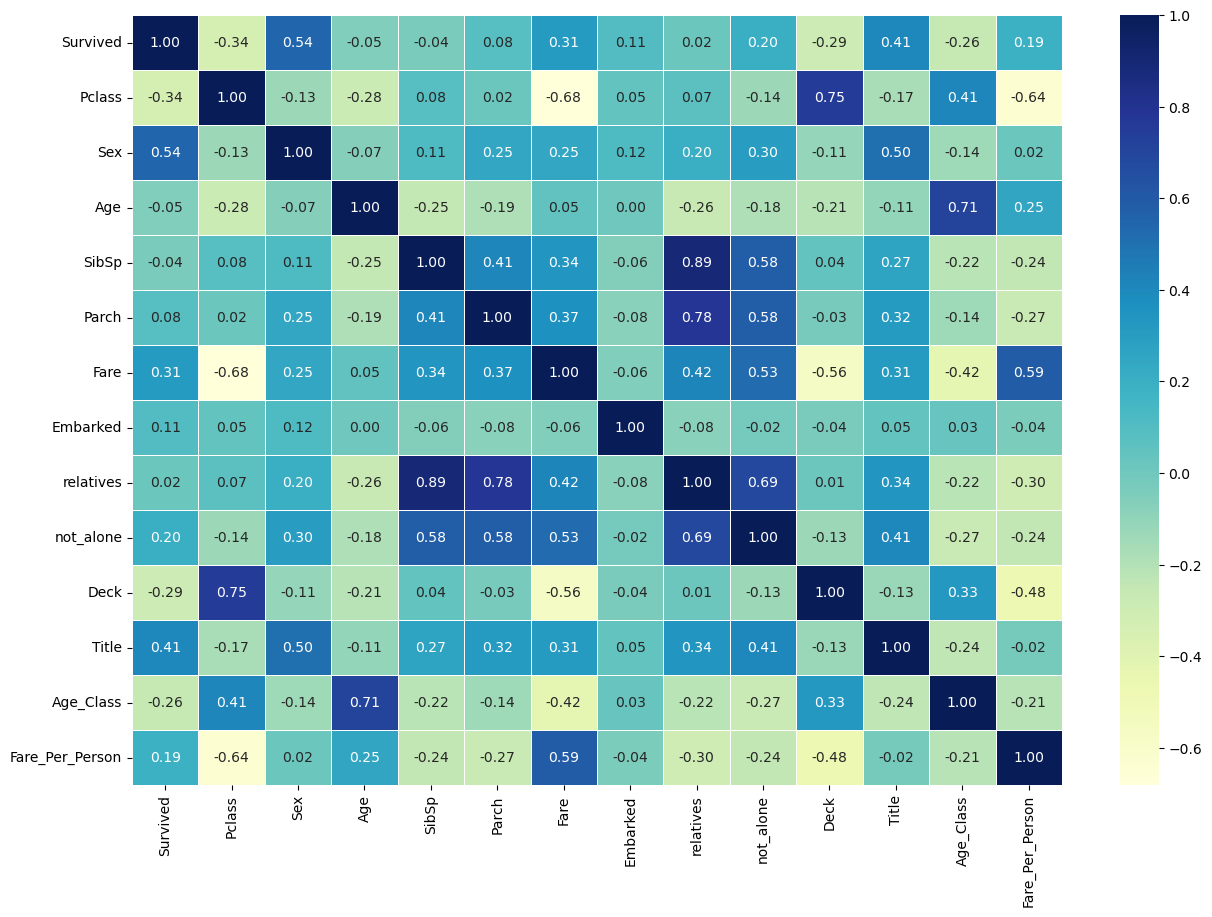

In [54]:
plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_mat,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

We can see the sex is the most influent parameter to survived and relatives is the lesser but no_alone is much greater.

In [55]:
relat_Surv = pd.crosstab(train_df.relatives, train_df.Survived)
relat_Surv

Survived,0,1
relatives,,
0,374,163
1,72,89
2,43,59
3,8,21
4,12,3
5,19,3
6,8,4
7,6,0
10,7,0


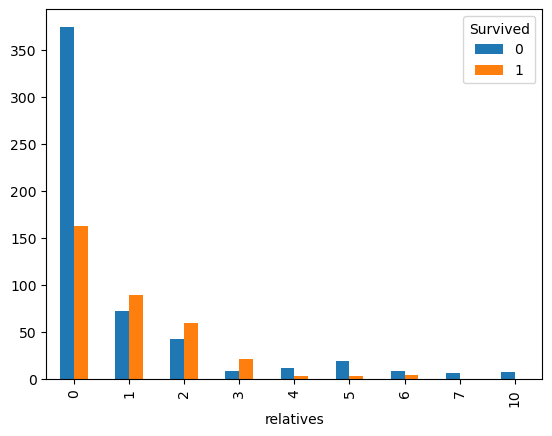

In [56]:
relat_Surv.plot.bar();

Calcul du pourcentage de survie pour chaque groupes

In [57]:
relat_Surv_percent = relat_Surv[1]/(relat_Surv[1] + relat_Surv[0])*100
relat_Surv_percent

relatives
0     30.353818
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
dtype: float64

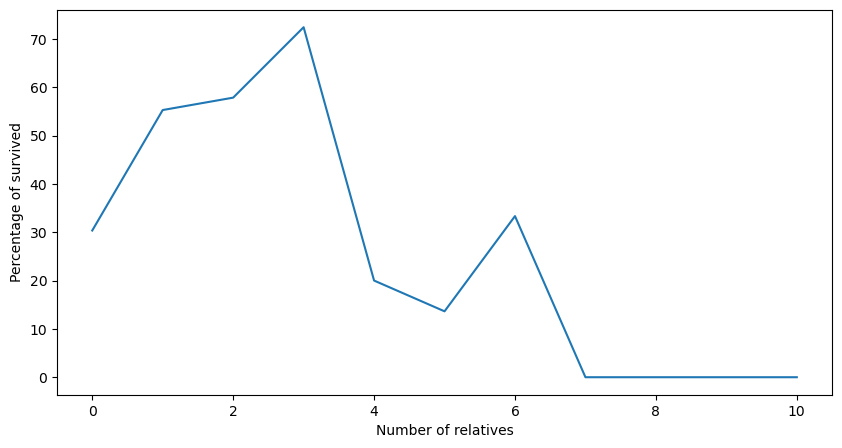

In [58]:
relat_Surv_percent.plot(figsize=(10,5),
                        xlabel="Number of relatives",
                        ylabel="Percentage of survived");

In [59]:
relat_not_alone = pd.crosstab(train_df.not_alone, train_df.Survived)
relat_not_alone

Survived,0,1
not_alone,,
0,374,163
1,175,179


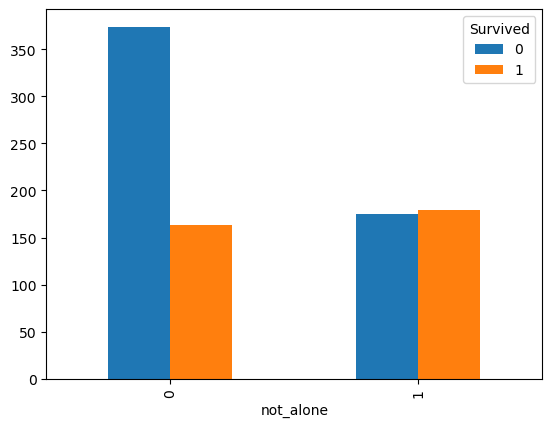

In [60]:
relat_not_alone.plot.bar();

In [61]:
relat_not_alone_percent = relat_not_alone[1]/(relat_not_alone[1] + relat_not_alone[0])*100
relat_not_alone_percent

not_alone
0    30.353818
1    50.564972
dtype: float64

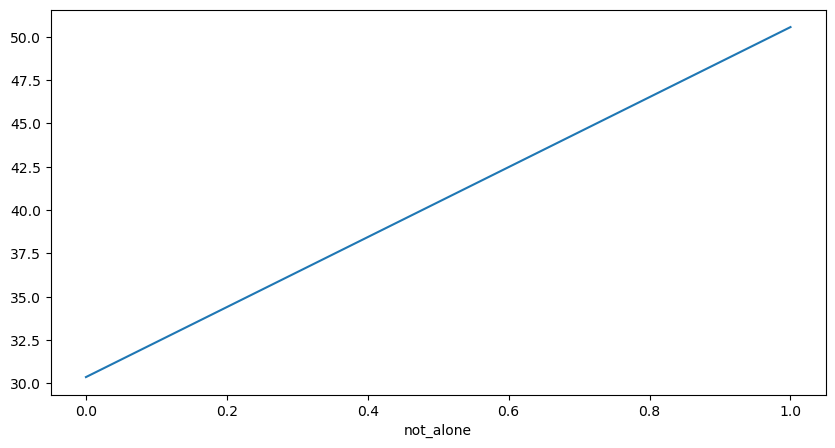

In [62]:
relat_not_alone_percent.plot(figsize=(10,5));

## Building Machine Learning Models
Now we will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other. Later on, we will use cross validation.

In [63]:
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [64]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [1]:
models = {"Stochastic Gradient Descent (SGD)":linear_model.SGDClassifier(max_iter=5, tol=None),
          "Random Forest":RandomForestClassifier(),
          "Logistic Regression":LogisticRegression(),
          "K Nearest Neighbor":KNeighborsClassifier(n_neighbors = 3),
          "Gaussian Naive Bayes":GaussianNB(),
          "Perceptron":Perceptron(max_iter=5),
          "Linear Support Vector Machine":LinearSVC(),
          "Decision Tree":DecisionTreeClassifier()}

def fit_score(X_train, X_valid, y_train, y_valid, models):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = round(model.score(X_valid, y_valid),4)*100
    return pd.DataFrame(model_scores, index=["accuracy"])

In [ ]:
model_scores = fit_score(X_train, X_valid, y_train, y_valid, models)

<AxesSubplot:>

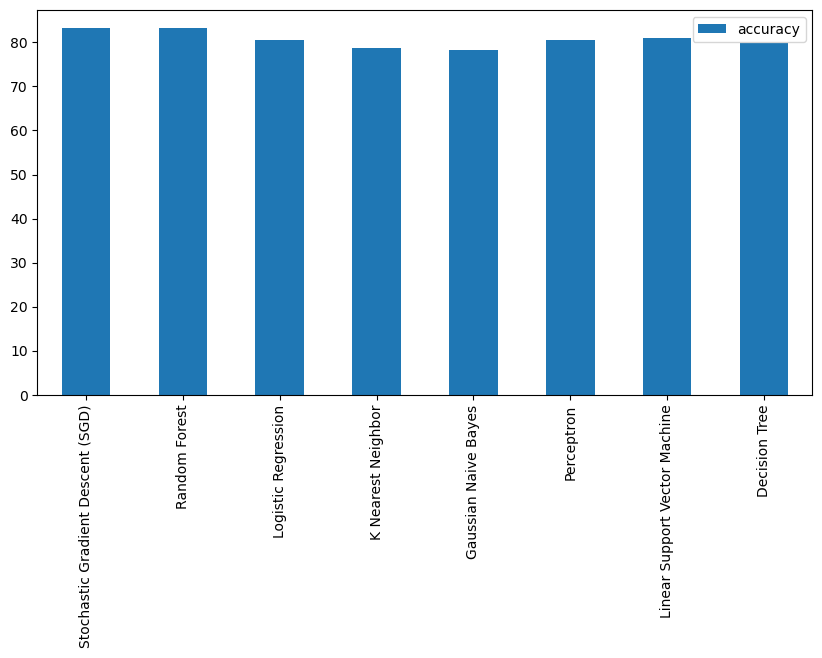

In [67]:
model_scores.T.plot.bar(figsize=(10, 5))

In [68]:
LinearSVC().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose'])

## Hyperparameter tuning with RandomizedSearchCV

In [69]:
# Create a hyperparameter grid for logisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear", "saga"],
                "max_iter": [100, 500, 1000]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

# Create a hyperparameter grid for Linear Support Vector Machine
linear_SVC_grid = {"C":np.logspace(-4, 4, 20),
                   "max_iter": np.arange(1000, 1500,100),
                   "loss":["hinge", "squared_hinge"]}

# Create a hyperparameter grid for Stochastic Gradient Descent (SGD)
SGD_grid = {"loss":["hinge", "log", "modified_huber"],
            "max_iter":np.arange(0, 100, 5),
            "tol": [0.001, None]}

DTC_grid = {"splitter":["best", "random"],
            "max_depth":[None, 3, 5, 10],
            "max_leaf_nodes":[None, 1, 2, 3]}

In [70]:
models_ = {"Random Forest":RandomForestClassifier(),
          "Logistic Regression":LogisticRegression(),                           
          "Linear Support Vector Machine":LinearSVC(),
          "Stochastic Gradient Descent (SGD)":linear_model.SGDClassifier(),
          "Decision Tree":DecisionTreeClassifier()}

grids_ = {"Random Forest":rf_grid,
          "Logistic Regression":log_reg_grid,                           
          "Linear Support Vector Machine":linear_SVC_grid,
          "Stochastic Gradient Descent (SGD)":SGD_grid,
          "Decision Tree":DTC_grid}

In [71]:
def Randomized_Search_CV(models, grids):
    np.random.seed(42)
    model_scores = {}
    model_best_params = {}
    for name, model in models_.items():
        rs = RandomizedSearchCV(model,
                                param_distributions=grids[name],
                                cv=5,
                                n_iter=20,
                                verbose=True)
        rs.fit(X_train, y_train)
        model_best_params[name] = rs.best_params_
        model_scores[name] = round(rs.score(X_valid, y_valid), 4)*100
    return (model_scores, model_best_params)

In [72]:
res = Randomized_Search_CV(models_, grids_)
res

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was re

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 314, in fit
    raise ValueError(
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn(s

({'Random Forest': 81.56,
  'Logistic Regression': 79.89,
  'Linear Support Vector Machine': 79.33,
  'Stochastic Gradient Descent (SGD)': 79.89,
  'Decision Tree': 84.92},
 {'Random Forest': {'n_estimators': 610,
   'min_samples_split': 18,
   'min_samples_leaf': 1,
   'max_depth': 5},
  'Logistic Regression': {'solver': 'liblinear',
   'max_iter': 100,
   'C': 11.288378916846883},
  'Linear Support Vector Machine': {'max_iter': 1400,
   'loss': 'hinge',
   'C': 0.012742749857031334},
  'Stochastic Gradient Descent (SGD)': {'tol': 0.001,
   'max_iter': 60,
   'loss': 'modified_huber'},
  'Decision Tree': {'splitter': 'random',
   'max_leaf_nodes': None,
   'max_depth': 10}})

In [73]:
pd.DataFrame(res[0], index=[0])

,Random Forest,Logistic Regression,Linear Support Vector Machine,Stochastic Gradient Descent (SGD),Decision Tree
0,81.56,79.89,79.33,79.89,84.92


In [74]:
model_scores

,Stochastic Gradient Descent (SGD),Random Forest,Logistic Regression,K Nearest Neighbor,Gaussian Naive Bayes,Perceptron,Linear Support Vector Machine,Decision Tree
accuracy,83.24,83.24,80.45,78.77,78.21,80.45,81.01,79.89


In [75]:
res[1]

{'Random Forest': {'n_estimators': 610,
  'min_samples_split': 18,
  'min_samples_leaf': 1,
  'max_depth': 5},
 'Logistic Regression': {'solver': 'liblinear',
  'max_iter': 100,
  'C': 11.288378916846883},
 'Linear Support Vector Machine': {'max_iter': 1400,
  'loss': 'hinge',
  'C': 0.012742749857031334},
 'Stochastic Gradient Descent (SGD)': {'tol': 0.001,
  'max_iter': 60,
  'loss': 'modified_huber'},
 'Decision Tree': {'splitter': 'random',
  'max_leaf_nodes': None,
  'max_depth': 10}}

## Hyperparameter tuning with GridSearchCV

In [76]:
# Create a hyperparameter grid for logisticRegression
log_reg_grid_ = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"],
                "max_iter": [500]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid_ = { "criterion" : ["gini", "entropy"], 
            "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
            "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
            "n_estimators": [100, 400, 700, 1000, 1500]}

# Create a hyperparameter grid for Linear Support Vector Machine
linear_SVC_grid_ = {"C":np.logspace(-4, 4, 20),
                   "max_iter":[1300],
                   "loss":["hinge"]}

# Create a hyperparameter grid for Stochastic Gradient Descent (SGD)
SGD_grid = {"loss":["log"],
            "max_iter":np.arange(0, 300, 70),
            "tol": [None]}

DTC_grid = {"splitter":["best"],
            "max_depth":np.arange(0, 50, 5),
            "max_leaf_nodes":[None]}

In [77]:
models__ = {"Random Forest":RandomForestClassifier( max_features='auto', 
                                                   oob_score=True, 
                                                   random_state=1, 
                                                   n_jobs=-1),
          "Logistic Regression":LogisticRegression(),                           
          "Linear Support Vector Machine":LinearSVC(),
          "Stochastic Gradient Descent (SGD)":linear_model.SGDClassifier(),
          "Decision Tree":DecisionTreeClassifier()}

grids__ = {"Random Forest":rf_grid,
          "Logistic Regression":log_reg_grid,                           
          "Linear Support Vector Machine":linear_SVC_grid,
          "Stochastic Gradient Descent (SGD)":SGD_grid,
          "Decision Tree":DTC_grid}

In [78]:
def Grid_Search_CV(models, grids):
    np.random.seed(42)
    model_scores = {}
    model_best_params = {}
    for name, model in models_.items():
        rs = GridSearchCV(model,
                          param_grid=grids[name],
                          cv=5,
                          verbose=True)
        rs.fit(X_train, y_train)
        model_best_params[name] = rs.best_params_
        model_scores[name] = round(rs.score(X_valid, y_valid), 4)*100
    return (model_scores, model_best_params)

In [79]:
# res_ = Grid_Search_CV(models__, grids__)
# res_

In [80]:
# pd.DataFrame(res_[0], index=["accuracy"])

In [81]:
# res_[1]

In [82]:
# On a deux models qui ressortent: 
rf = RandomForestClassifier(n_estimators=510, min_samples_split=14, min_samples_leaf=1)
lin_SVC = LinearSVC(C=11.288378916846883, loss='hinge', max_iter=1400)

In [83]:
rf.fit(X_train, y_train)
lin_SVC.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=11.288378916846883, loss='hinge', max_iter=1400)

## Evaluating our tuned machine learning classifier, beyond accuracy

In [84]:
import pickle

# Save an existing model to file
pickle.dump(rf, open("rf_random_forest_model_1.pkl", "wb")) # write binary
pickle.dump(lin_SVC, open("lin_SVC_linear_SVC_model_1.pkl", "wb"))

In [85]:
# Load a saved model
loaded_pickle_model_rf = pickle.load(open("rf_random_forest_model_1.pkl", "rb"))
loaded_pickle_model_lin_SVC = pickle.load(open("lin_SVC_linear_SVC_model_1.pkl", "rb"))

In [86]:
y_preds = loaded_pickle_model_rf.predict(X_valid)

In [87]:
y_preds_lin_SVC = loaded_pickle_model_lin_SVC.predict(X_valid)

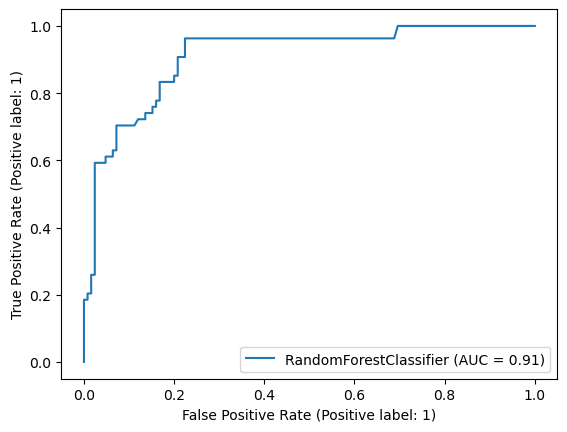

In [88]:
RocCurveDisplay.from_estimator(loaded_pickle_model_rf, X_valid, y_valid);

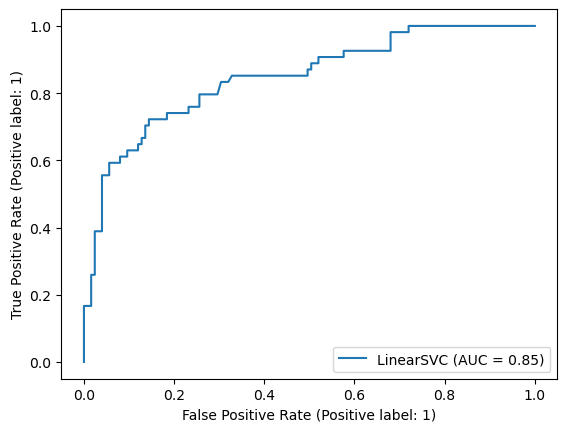

In [89]:
RocCurveDisplay.from_estimator(loaded_pickle_model_lin_SVC, X_valid, y_valid);

In [90]:
# Confusion matrix
confusion_matrix(y_valid, y_preds)

array([[112,  13],
       [ 16,  38]], dtype=int64)

In [91]:
# Confusion matrix
confusion_matrix(y_valid, y_preds_lin_SVC)

array([[105,  20],
       [ 15,  39]], dtype=int64)

In [92]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_valid, y_preds):
    """
    Plot a confusion matrix heatplot using heatmap
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_valid, y_preds),
                    annot=True, # Annotate the boxes with cnf_mat info 
                    cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label");  

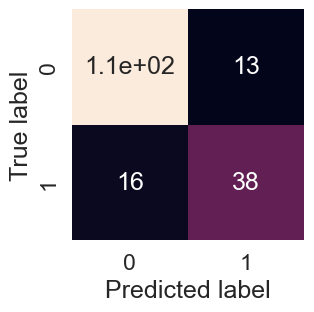

In [93]:
plot_conf_mat(y_valid, y_preds)

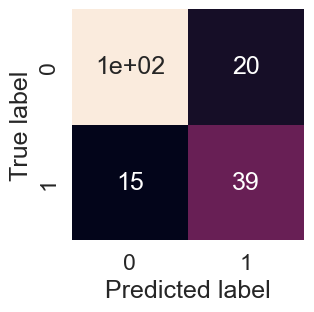

In [94]:
plot_conf_mat(y_valid, y_preds_lin_SVC)

In [95]:
print(classification_report(y_valid, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       125
           1       0.75      0.70      0.72        54

    accuracy                           0.84       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.84      0.84      0.84       179



In [96]:
print(classification_report(y_valid, y_preds_lin_SVC))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       125
           1       0.66      0.72      0.69        54

    accuracy                           0.80       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.81      0.80      0.81       179



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1 score of our model using cross-validation and to do so we will use `cross-val-score()`.

In [97]:
scoring_ = ["accuracy", "precision", "recall", "f1"]
models = {"Random_Forest":loaded_pickle_model_rf, "linear_SVC":loaded_pickle_model_lin_SVC} 
models.keys()

dict_keys(['Random_Forest', 'linear_SVC'])

In [98]:
def eval_metrics(scoring_, X, y, model, name):
    cv = {}
    for score in scoring_:
        cv[score] = cross_val_score(model, 
                                    X, 
                                    y, 
                                    cv=5, 
                                    scoring=score)
        cv[score] = round(np.mean(cv[score]), 4)*100
    return pd.DataFrame(cv, index=[name])

In [99]:
rf_metrics = eval_metrics(scoring_, X, y, loaded_pickle_model_rf, "Random_Forest")

In [100]:
lin_SVC_metrics = eval_metrics(scoring_, X, y, loaded_pickle_model_lin_SVC, "linear_SVC")

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

In [101]:
rf_metrics

,accuracy,precision,recall,f1
Random_Forest,82.49,81.53,73.37,76.19


In [102]:
lin_SVC_metrics

,accuracy,precision,recall,f1
linear_SVC,72.72,75.38,73.36,70.3


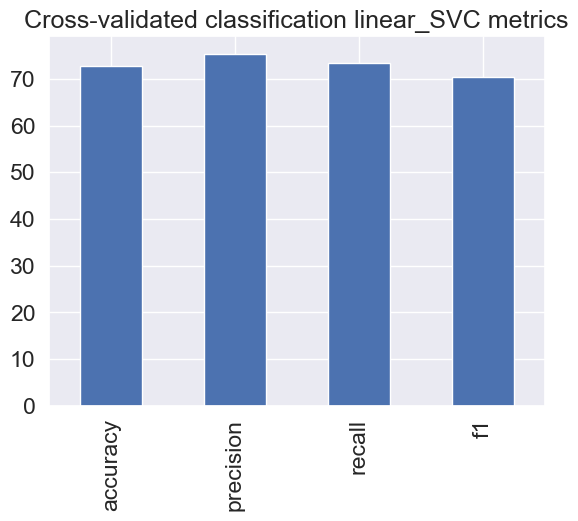

In [103]:
lin_SVC_metrics.T.plot.bar(title="Cross-validated classification linear_SVC metrics",
                      legend=False);

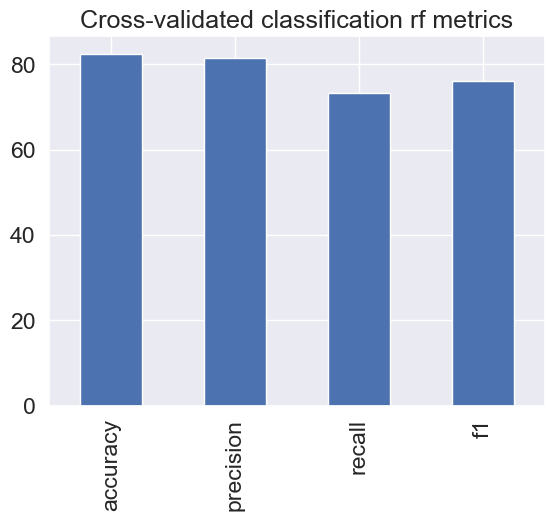

In [104]:
rf_metrics.T.plot.bar(title="Cross-validated classification rf metrics",
                      legend=False);

### Feature Importance

In [105]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": np.round(importances, 3)})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature_importance")
    ax.invert_yaxis()

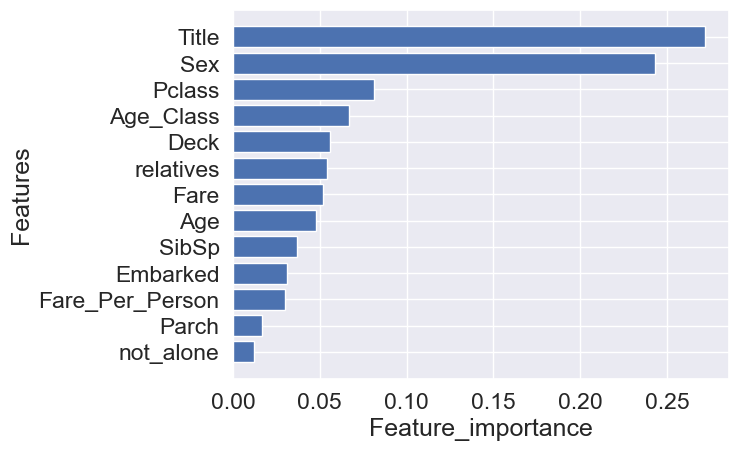

In [106]:
plot_features(X_train.columns, loaded_pickle_model_rf.feature_importances_)

In [107]:
# Match coef's of features to columns

feature_dict = dict(zip(X_train.columns, list(lin_SVC.coef_[0])))

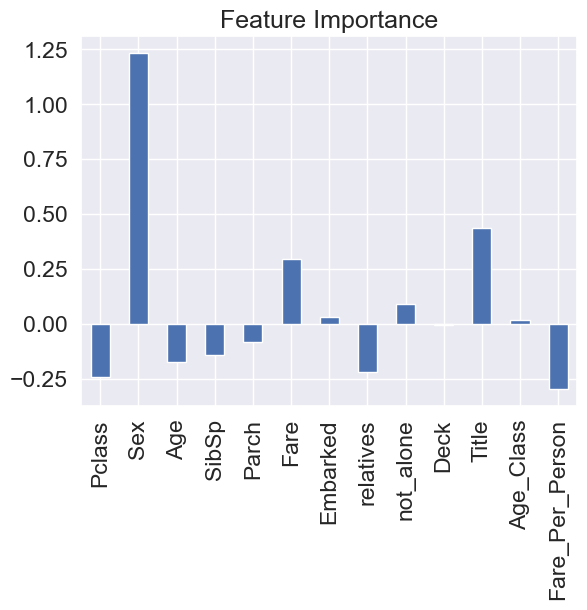

In [108]:
# Visualize feature importance

feature_df = pd.DataFrame(feature_dict,
                          index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

Conclusion:
not_alone and Parch doesn’t play a significant role in our random forest classifiers prediction process. Because of that I will drop them from the dataset and train the classifier again. We could also remove more or less features, but this would need a more detailed investigation of the features effect on our model. But I think it’s just fine to remove only Alone and Parch.

In [109]:
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

In [110]:
loaded_pickle_model_rf.fit(X_train, y_train)
Y_prediction = loaded_pickle_model_rf.predict(X_test)

acc_random_forest = round(loaded_pickle_model_rf.score(X_valid, y_valid) * 100, 2)
print(round(acc_random_forest,2,), "%")

83.8 %


In [111]:
eval_metrics(scoring_, X_valid, y_valid, loaded_pickle_model_rf, "Random_Forest")

,accuracy,precision,recall,f1
Random_Forest,81.03,73.14,61.27,63.76


There is also another way to evaluate a random-forest classifier, which is probably much more accurate than the score we used before. What I am talking about is the out-of-bag samples to estimate the generalization accuracy. I will not go into details here about how it works. Just note that out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set.

In [112]:
print("oob score:", round(loaded_pickle_model_rf.oob_score, 4)*100, "%")

oob score: 0 %


In [113]:
# rf_dict = {"Random Forest": models__["Random Forest"]}
# rf_grid = {"Random Forest": grids__["Random Forest"]}
# clf = Grid_Search_CV(rf_dict, rf_grid)

In [114]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_valid, y_valid)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.72 %


In [115]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(random_forest, X_valid, y_valid, cv=3)
confusion_matrix(y_valid, predictions)

array([[113,  12],
       [ 21,  33]], dtype=int64)

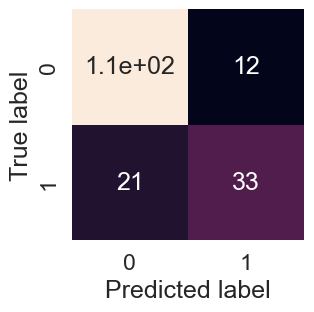

In [116]:
plot_conf_mat(y_valid, predictions)

In [117]:
eval_metrics(scoring_, X_valid, y_valid, random_forest, "Random Forest")

,accuracy,precision,recall,f1
Random Forest,80.46,70.17,61.09,65.01


In [125]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_valid)

In [126]:
y_scores = y_scores[:,1]

In [128]:
precision, recall, threshold = precision_recall_curve(y_valid, y_scores)

In [174]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=3)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=3)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="lower left", fontsize=15)
    plt.ylim([0, 1])

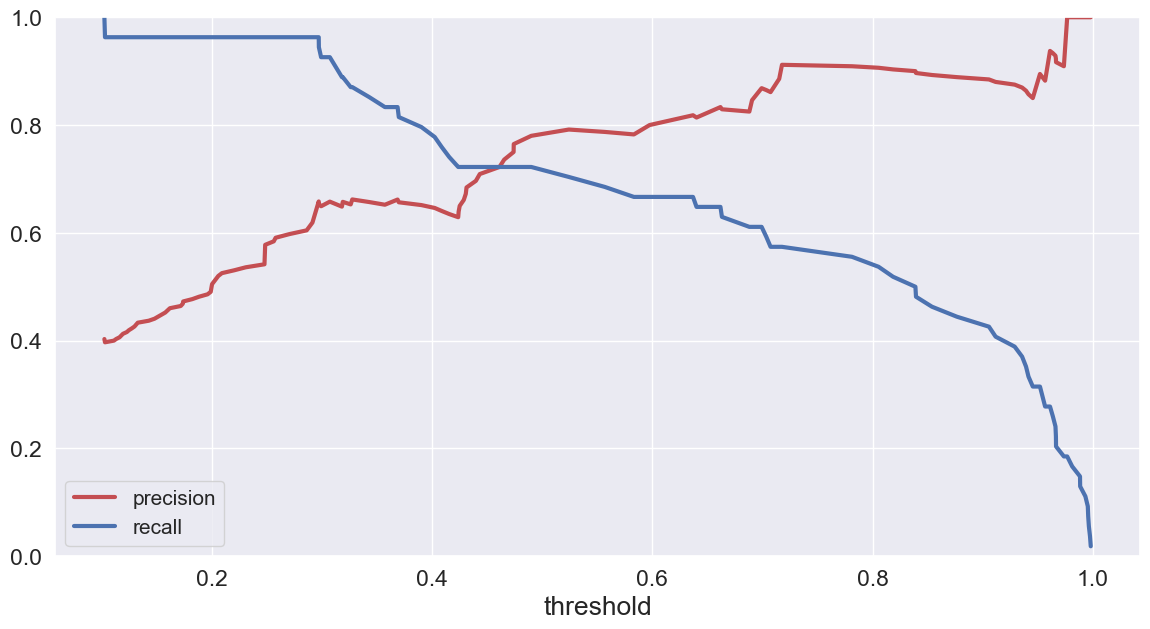

In [175]:
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [147]:
precision[:-1]

array([0.40298507, 0.39694656, 0.4       , 0.40310078, 0.40625   ,
       0.41269841, 0.416     , 0.41935484, 0.42276423, 0.42622951,
       0.43333333, 0.43697479, 0.44067797, 0.45217391, 0.46017699,
       0.46428571, 0.46846847, 0.47272727, 0.47706422, 0.48148148,
       0.48598131, 0.49056604, 0.50485437, 0.52      , 0.52525253,
       0.53061224, 0.53608247, 0.54166667, 0.57777778, 0.58426966,
       0.59090909, 0.59770115, 0.60465116, 0.61904762, 0.65822785,
       0.65384615, 0.64935065, 0.65789474, 0.64864865, 0.65753425,
       0.65277778, 0.66197183, 0.65714286, 0.65217391, 0.66176471,
       0.65671642, 0.65151515, 0.64615385, 0.640625  , 0.63492063,
       0.62903226, 0.63934426, 0.65      , 0.66101695, 0.67241379,
       0.68421053, 0.69642857, 0.70909091, 0.72222222, 0.73584906,
       0.75      , 0.76470588, 0.78      , 0.79166667, 0.78723404,
       0.7826087 , 0.8       , 0.81818182, 0.81395349, 0.83333333,
       0.82926829, 0.825     , 0.84615385, 0.86842105, 0.86486

In [176]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

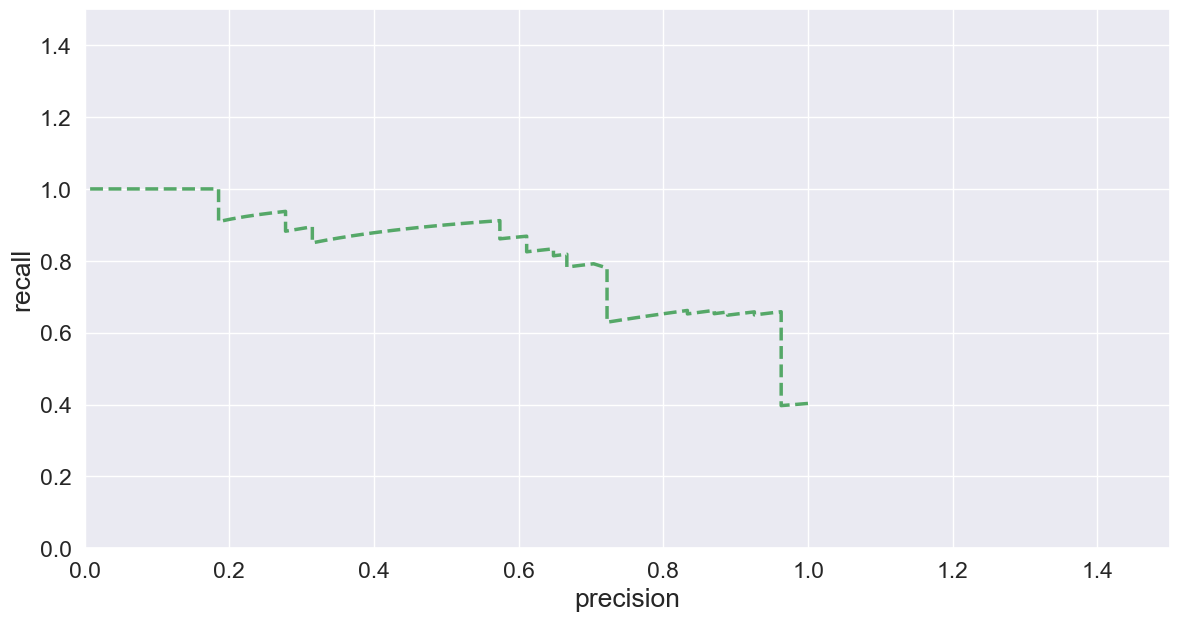

In [177]:
plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

In [180]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid, y_scores)

In [190]:
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

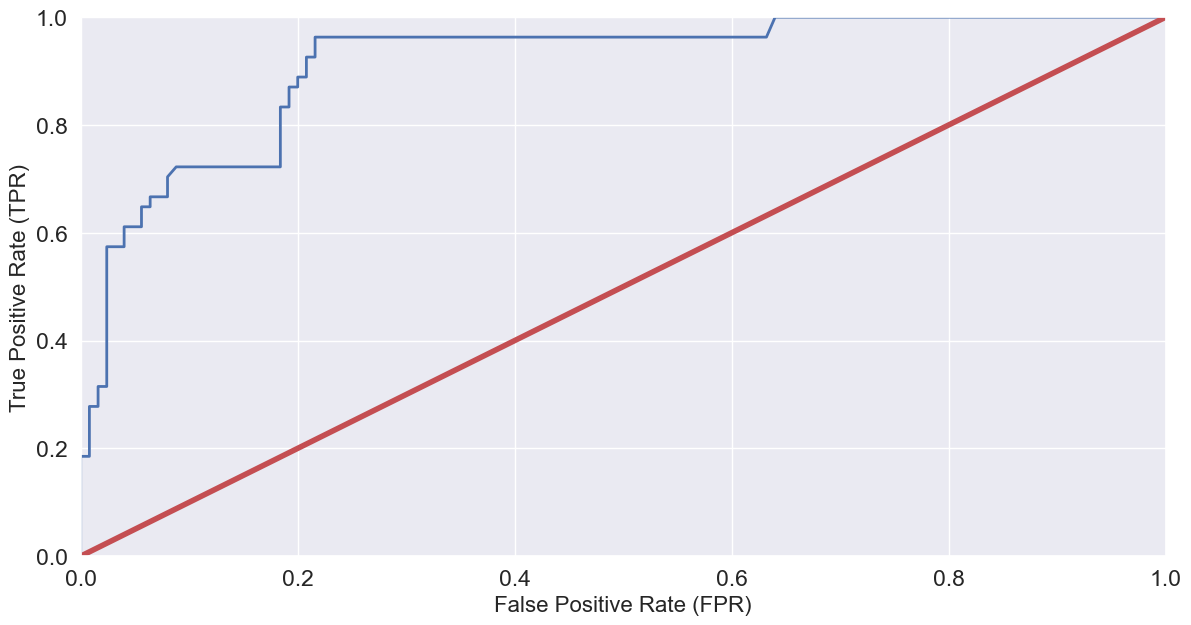

In [191]:
plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [193]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_valid, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9126666666666665


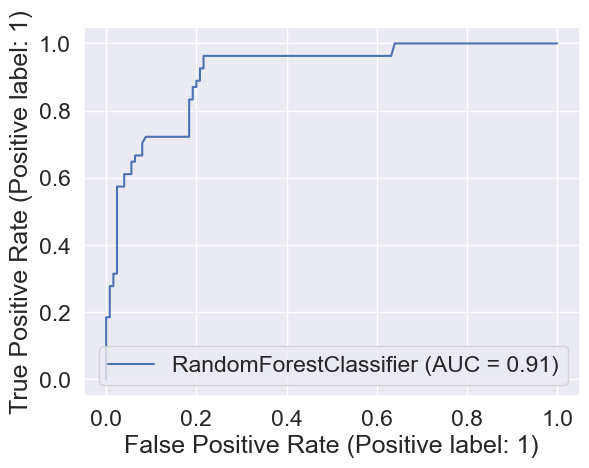

In [192]:
RocCurveDisplay.from_estimator(random_forest, X_valid, y_valid);

In [201]:
df_preds = pd.DataFrame()
df_preds["PassengerId"] = test_df["PassengerId"]
df_preds["Survived"] = random_forest.predict(X_test)
df_preds

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [202]:
# Exports predictions data
df_preds.to_csv("data/test_predictions.csv", index=False)